# Task F
Train a linear regression model on the BOSTON dataset to predict median values of houses. Test it on the test set. Show the code how you did it! What dependent variables (columns) have the biggest influence?


## Import of needed classes

In [3]:
# import of all needed classes
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd
import seaborn as sns 
import sklearn
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [4]:
# import the Boston Housing Dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [5]:
# loading the data into a panda dataframe and add the target value "MEDV" as a new column
data = pd.DataFrame(boston_dataset.data) 
data.columns = boston_dataset.feature_names 
data['MEDV']=boston_dataset.target
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
# save the 13 attributes in variable x and the target value "MEDV" as variable y
x = boston_dataset.data
y = boston_dataset.target

In [7]:
# divide the dataset into a training and a test subsample. Test size will be 0.2 which means 20% of all the 506 samples will be used to test our machine learning model
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 5)


In [8]:
# Print of the concrete sizes of train and test samples
print("xtrain shape : ", X_train.shape) 
print("xtest shape  : ", X_test.shape) 
print("ytrain shape : ", Y_train.shape) 
print("ytest shape  : ", Y_test.shape) 

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [9]:
# Train the linear regression model on our train subsample
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(X_train, Y_train)
# Use our trained model to predict values for the testing subsample
Y_pred = model.predict(X_test) 

In [10]:
print(model.coef_)

[-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]


In [13]:
# Determine the R2 score for our testing sample
Y_test_predict = model.predict(X_test)

r2 = r2_score(Y_test, Y_test_predict)
print('R2 score is {}'.format(r2))

R2 score is 0.7334492147453092


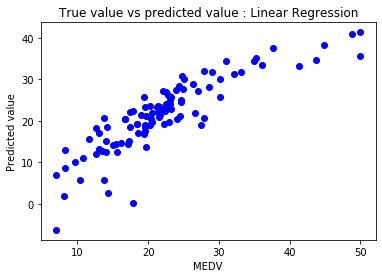

In [11]:
# Plotting a graph with our predicted values on the y axis and the real values on the x axis in order to evaluate our model
plt.scatter(Y_test , Y_pred, color = 'blue') 
plt.xlabel("MEDV") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 


     

In [28]:
# Printing out the predicted value in the first column and the real values in the second column
for i in range(0, len(Y_test)):
    print(str(Y_pred[i])+ "--------------" + str(Y_test[i]))
    

37.56311787385153--------------37.6
32.14445142742903--------------27.9
27.065736286192816--------------22.6
5.670806325121717--------------13.8
35.099825772076116--------------35.2
5.858037009784127--------------10.4
27.537085056340935--------------23.9
31.81019187729471--------------29.0
26.356347708572354--------------22.8
22.772087484054733--------------23.2
31.911830475118876--------------33.2
21.50224060707395--------------19.0
23.70119982655592--------------20.3
33.362250395074845--------------36.1
28.516335912263372--------------24.4
14.394568986561584--------------17.2
0.1928402517728074--------------17.9
18.66247154712194--------------19.6
13.710041389332233--------------19.7
14.134086351024301--------------15.0
2.0326395231169414--------------8.1
19.728083102516436--------------23.0
38.18657428694752--------------44.8
24.197600579577912--------------23.1
31.3024797275613--------------32.2
11.141445440215701--------------10.8
25.03636951028133--------------23.1
23.27970871361

# Which variables have the highest impact?

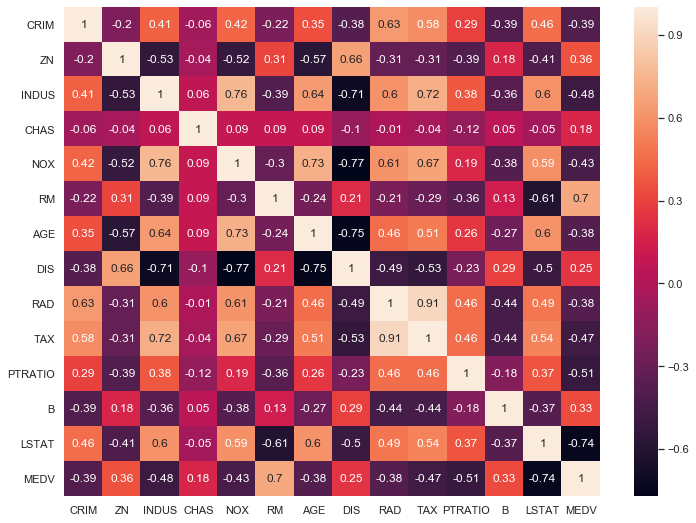

In [15]:
# Plotting a correlation matrix using the heatmap function from the seaborn library. The matrix measures the linear relationship between the variables
correlation_matrix = data.corr().round(2)
sns.set(rc={'figure.figsize':(12, 9)})
sns.heatmap(data=correlation_matrix, annot=True)

The correlation amtrix shows that LSTAT and rooms have the highest impact on the median value

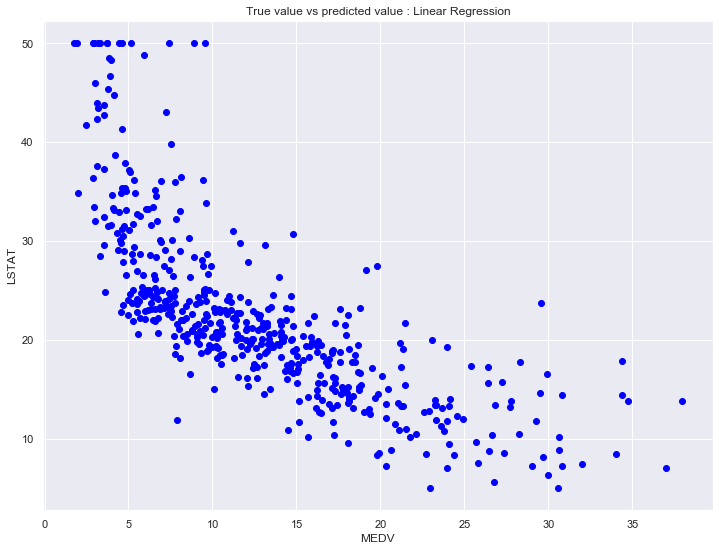

In [16]:
# Plotting the LSTAT on the y axis and MEDV on the x axis
plt.scatter(data['LSTAT'], data['MEDV'], color = 'blue')
plt.xlabel('MEDV')
plt.title("True value vs predicted value : Linear Regression") 
plt.ylabel('LSTAT')
plt.show()

Text(0, 0.5, 'Rooms')

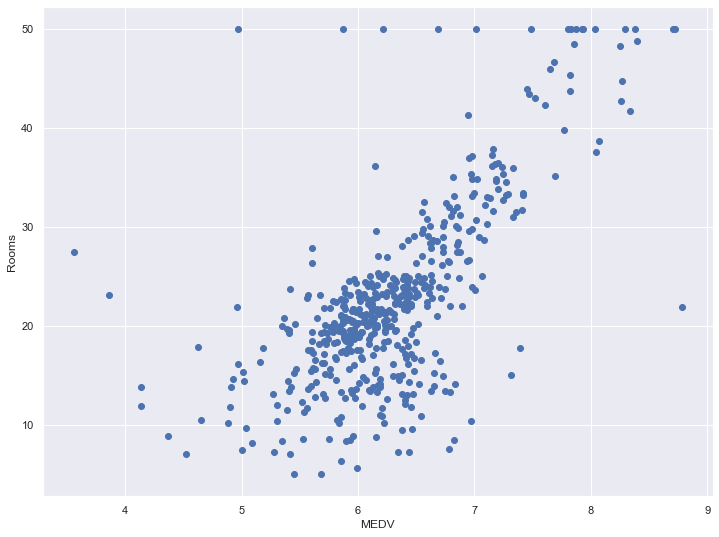

In [17]:
# Plotting the Rooms on the y axis and the MEDV on the x axis
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel('MEDV')
plt.ylabel('Rooms')

In [18]:
# creating a new variable W with only the LSTAT and Room values
W = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])

Z = data['MEDV']

In [19]:
# splitting the data in training and test set again with a 80:20 ratio


W_train, W_test, Z_train, Z_test = sklearn.model_selection.train_test_split(W, Z, test_size = 0.2, random_state=5)

print(W_train.shape)

print(W_test.shape)

print(Z_train.shape)

print(Z_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [20]:
# applying the Linear Regression model with only the two values LSTAT and Rooms
model_two = LinearRegression()
model_two.fit(W_train, Z_train)
prediction_2 = model_two.predict(W_test)

In [25]:
# Determine the R2 score of the Test set to evaluate the model.
Z_test_predict = model_two.predict(W_test)

r2 = r2_score(Z_test, Z_test_predict)
print('R2 score is {}'.format(r2))

R2 score is 0.6628996975186954


In [26]:
for i in range(0, len(Y_test)):
    print(str(prediction_2[i])+ "--------------" + str(Y_test[i]))

37.38999403450201--------------37.6
29.79290610929409--------------27.9
25.867552974668143--------------22.6
0.3137082808213769--------------13.8
33.313855585417315--------------35.2
7.971361018030155--------------10.4
30.70663870075809--------------23.9
27.830768420640396--------------29.0
26.26693081384288--------------22.8
21.978716779021443--------------23.2
32.33149331676488--------------33.2
23.21791374203142--------------19.0
22.993288898931116--------------20.3
30.97465355601652--------------36.1
27.197476868570533--------------24.4
20.71715439722422--------------17.2
-0.6752498573889696--------------17.9
18.012486541901367--------------19.6
12.310810899354665--------------19.7
21.906158272332192--------------15.0
4.822622270794536--------------8.1
24.004230256155278--------------23.0
37.702793958561024--------------44.8
24.59521859192327--------------23.1
29.63557290408483--------------32.2
12.539628795486834--------------10.8
27.070813366120596--------------23.1
22.4448589644

# Answer
The linear regression model is trained and tested on the Boston Housing Dataset. In order to evaluate the model we have printed out the regression coefficients in cell 10. Moreover the R2 score of 0,73 shows that the regression model is quite accurate since an R2 score of 1.0 is the best possible. In addition there is a graph, showing how the predicted values differ from the real values. The table shows every single predicted MEDV next to the real value and the difference of both numbers.

Second part of the task was to determine, which columns have the highest impact on the median value of each house. Therefore we used a correlation matrix. It measures the linear relationship between the variables. The closer the coefficients get to -1 or 1, the stronger the linear relationship is. The correlation between "LSTAT" and "MEDV" is -0,74, which means it has an strong negative impact on the median value. The higher the value for "LSTAT" gets, the lower the median value of the house. 
Number of rooms per dwelling and median value have a correlation of 0,7, meaning that the rooms have the second largest impact on median value, but instead of lowering the value, more rooms raise the median value.
We fitted another regression model with only these two attributes. The two graphs give evidence of how both attributes impact median value. The R2 score of 0,66 is slightly lower than the one with all attributes into consideration. Same as with the other model there is a table with all predicted values and the real values of the test set.